# <font color="darkgreen"> Exercises</font>

In [37]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
from wrangle import wrangle_telco
from wrangle import acquire_telco
from wrangle import clean_telco
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [38]:
#prep
train, validate, test = wrangle_telco(split=True)
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
3396-DKDEL,115.15,70,8250.00
8966-KZXXA,25.10,36,930.95
8857-CUPFQ,19.25,63,1237.65
6901-GOGZG,84.95,60,4984.85
8606-OEGQZ,25.30,18,454.65


**1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can.**

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

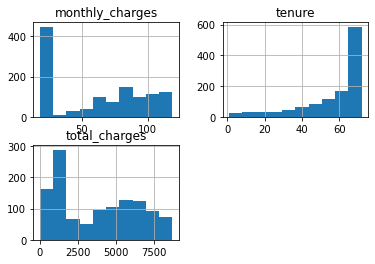

In [39]:
train.hist()

In [40]:
train.monthly_charges.min()

18.4

In [41]:
train.monthly_charges.max()

118.75

In [42]:
train.total_charges.min()

20.45

In [43]:
train.total_charges.max()

8672.45

In [44]:
#Scalers

### <font color="purple">Min-Max Scaler</font>


In [45]:
#make the thing
scaler = sklearn.preprocessing.MinMaxScaler()

In [46]:
# We fit on the training data
# in a way, we treat our scalers like our ML models
# we only .fit on the training data
scaler.fit(train)

MinMaxScaler()

In [47]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)


In [49]:
train_scaled[0:5]

array([[0.96412556, 0.97183099, 0.95117314],
       [0.06676632, 0.49295775, 0.10523578],
       [0.00847035, 0.87323944, 0.14068423],
       [0.66317887, 0.83098592, 0.57378641],
       [0.06875934, 0.23943662, 0.05018493]])

In [50]:
# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [52]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,0.964126,0.971831,0.951173
1,0.066766,0.492958,0.105236
2,0.008470,0.873239,0.140684
3,0.663179,0.830986,0.573786
4,0.068759,0.239437,0.050185


<AxesSubplot:>

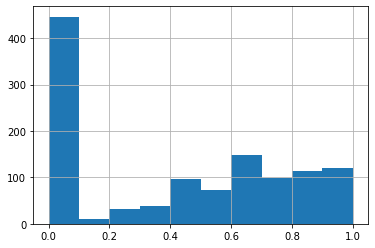

In [53]:
train_scaled.monthly_charges.hist()

<AxesSubplot:>

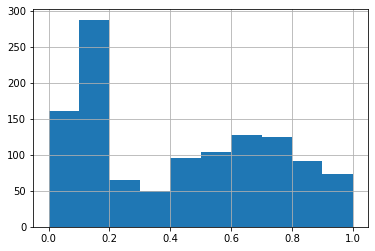

In [54]:
train_scaled.total_charges.hist()

<AxesSubplot:>

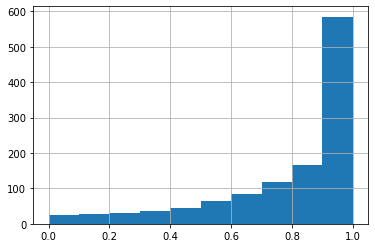

In [56]:
train_scaled.tenure.hist()

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

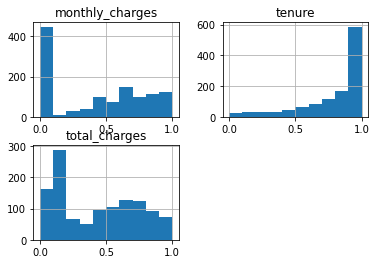

In [58]:
train_scaled.hist()

### <font color='darkcyan'>Standard Scaler</font>

In [59]:
scaler2 = sklearn.preprocessing.StandardScaler()
scaler2.fit(train)

StandardScaler()

In [60]:
standard_train_scaled = scaler2.transform(train)
standard_validate_scaled = scaler2.transform(validate)
standard_test_scaled = scaler2.transform(test)


In [62]:
# turn the numpy arrays into dataframes
standard_train_scaled = pd.DataFrame(standard_train_scaled, columns=train.columns)
standard_validate_scaled = pd.DataFrame(standard_validate_scaled, columns=train.columns)
standard_test_scaled = pd.DataFrame(standard_test_scaled, columns=train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

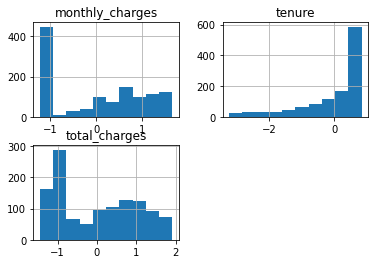

In [63]:
standard_train_scaled.hist()

### <font color='violet'>Robust Scaler</font>

In [65]:
scaler3 = sklearn.preprocessing.RobustScaler()
scaler3.fit(train)

RobustScaler()

In [66]:
rob_train_scaled = scaler3.transform(train)
rob_validate_scaled = scaler3.transform(validate)
rob_test_scaled = scaler3.transform(test)

In [68]:
rob_train_scaled = pd.DataFrame(rob_train_scaled, columns= train.columns)
rob_validate_scaled = pd.DataFrame(rob_validate_scaled, columns= train.columns)
rob_test_scaled =pd.DataFrame(rob_test_scaled, columns = train.columns)


array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

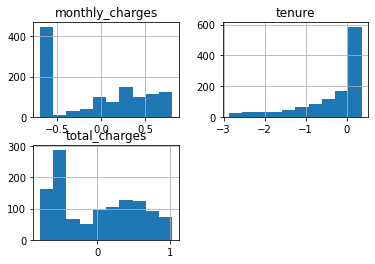

In [69]:
rob_train_scaled.hist()

**2. Apply the `inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?**

In [70]:
train_unscaled = scaler.inverse_transform(train_scaled)
train_unscaled = pd.DataFrame(train_unscaled, columns=train.columns)
train_unscaled.head()

,monthly_charges,tenure,total_charges
0,115.15,70.0,8250.00
1,25.10,36.0,930.95
2,19.25,63.0,1237.65
3,84.95,60.0,4984.85
4,25.30,18.0,454.65


#### ^
<font color="darkgreen">The resulting dataset is the same as the original data</font>

**3. Read the documentation for sklearn's `QuantileTransformer`. Use normal for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.**

In [71]:
quant_scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
quant_scaler.fit(train)

QuantileTransformer(output_distribution='normal')

In [72]:
train_quant = quant_scaler.transform(train)
train_quant = pd.DataFrame(train_quant, columns = train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

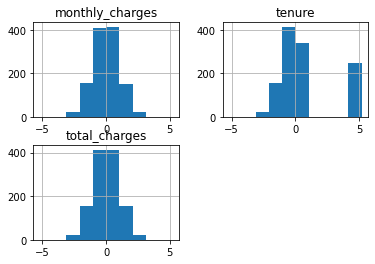

In [73]:
train_quant.hist()

**4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?**

In [74]:
quant_scaler2 = sklearn.preprocessing.QuantileTransformer()
quant_scaler2.fit(train)

QuantileTransformer()

In [75]:
train_quant2 = quant_scaler2.transform(train)
train_quant2 = pd.DataFrame(train_quant2, columns=train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

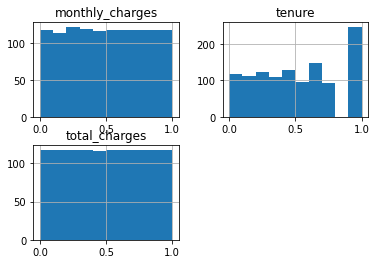

In [76]:
train_quant2.hist()

**5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!**

In [78]:
def scale_data(train,validate,test):
    '''Accepts train, validate, test data frames and applies min-max scaler
    return: train, validate, test scaled pandas dataframe'''
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train)
    
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    
    return train_scaled, validate_scaled, test_scaled

In [ ]:
#insert border seperation here

## **Post Walkthrough Exercises**